In [19]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

In [4]:
(train_ds, test_ds), ds_info = tfds.load(name='mnist', 
                                         shuffle_files=True, 
                                         with_info=True, as_supervised=True, 
                                         split=['train', 'test'])

train_ds_iter = iter(train_ds)
images, labels = next(train_ds_iter)

In [5]:
def standardization(images, labels):
    images = tf.cast(images, tf.float32) / 255.
    return [images, labels]

In [6]:
train_ds = train_ds.map(standardization)

In [20]:
# 데이터 로드 / 표준화 과정을 한 함수로 압축

def mnist_data_loader():
    
    def standardization(images, labels):
        images = tf.cast(images, tf.float32) / 255.
        return [images, labels]
    
    (train_ds, test_ds), ds_info = tfds.load(name='mnist', shuffle_files=True,
                                             as_supervised=True, split=['train', 'test'], 
                                             with_info=True, batch_size=4)
    
    train_ds = train_ds.map(standardization)
    test_ds = test_ds.map(standardization)
    return train_ds, test_ds

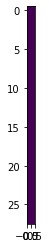

In [27]:
for images, labels in train_ds:
    plt.imshow(images[4])
    break